# Lidar Remote Sensing of Snow

In this tutorial, we will learn how to work with lidar derived raster product that represent topography, vegetaion and snow depth. The objectives include:
1. Understanding the basic concept of lidar remote sensing
2. Identifying available lidar data for snow 
3. Working with and plotting raster data using python

## Basic Concept Of Lidar Remote Sensing
Lidar stands for light detection and Ranging. 
See the figure below for the graphical representation of the common raster format of lidar derived products. For snow interest, the difference of Snow-On DEMs and Snow-off DEMs gives the snow depth. Read more here: https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/
![](https://www.earthdatascience.org/images/earth-analytics/lidar-raster-data/lidarTree-height.png)

## Available Data for Lidar Remote Sensing

Various lidar data has been acquired to monitory snow over the western US.
1. 2013 - 2019: ASO data
2. 2020 Quantunmn data over some selected areas.
3. 2021 Quantumn data over selected areas
4. 2022: Riegl flight over MCS

For the 2020 and 2021 data we have lidar data including 
The lidar data we have include:

1. DEMs (SnowOn and SnowFree)
2. DSMs (SnowOn and SnowFree)
3. Vegetation Height (SnowOn and SnowFree)
4. Snow Depth
5. Intensity Images (SnowOn and SnowFree)

For areas such as 
2020:
2021:

### Open and Explore raster data

To begin, let's load the necessary packages for this tutorial

In [5]:
#import packages

import os

import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd #for vector data
import xarray as xr
import rioxarray #for raster data
import rasterstats as rs



Let's open the snow depth, DEM and vegetation data of Cameron using rioxarray. This will create a dataArray object that stores the raster data in a numpy array format and spatial metadata information. 

In [2]:
cam_sd = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lidar/results/2021/Cameron/Cameron_SD.tif', masked = True)
cam_dem = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lidar/results/2021/Cameron/SnowFreeSept2021/Cameron_Bare_Earth_DEMs_mosaic.tif', masked = True)
cam_vh = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/lidar/results/2021/Cameron/Cameron_VH.tif', masked = True)


What does the DataArray object looks like

In [3]:
cam_sd

<xarray.DataArray (band: 1, y: 15118, x: 9600)>
[145132800 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.223e+05 4.223e+05 ... 4.271e+05 4.271e+05
  * y            (y) float64 4.492e+06 4.492e+06 ... 4.484e+06 4.484e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

The data has about 145 million values. Let's check the shape, CRS,extent and resolution and do a quick plot using `xarray.plot()`. Read about dataArray.plot()

In [4]:
print('The shape of the data is is:', cam_sd.shape)
print('\n CRS of the data is:', cam_sd.rio.crs)
print('\n The spatial extent of the data is:', cam_sd.rio.bounds())
print('\n The resolution of the data is:', cam_sd.rio.resolution())


The shape of the data is is: (1, 15118, 9600)

 CRS of the data is: PROJCS["unnamed",GEOGCS["Unknown datum based upon the GRS 1980 ellipsoid",DATUM["Not_specified_based_on_GRS_1980_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6019"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4019"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

 The spatial extent of the data is: (422266.5, 4484116.0, 427066.5, 4491675.0)

 The resolution of the data is: (0.5, -0.5)


Let's quickly see the plot and see the distribution of pixel values. 

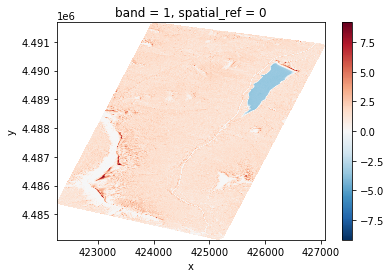

In [5]:
cam_sd.plot() 
#customise the plot to change the title, axis labels, and the colorbar
plt.show()

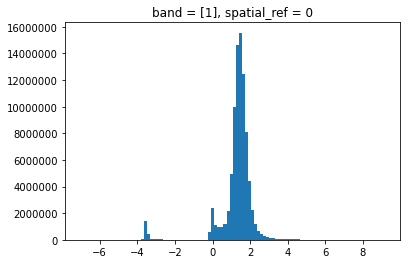

In [4]:
cam_sd.plot.hist(bins=100)
#turn off scientific notation
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
plt.show()

Let's make a better looking plot. How about Plotting the DEM, SD and VH

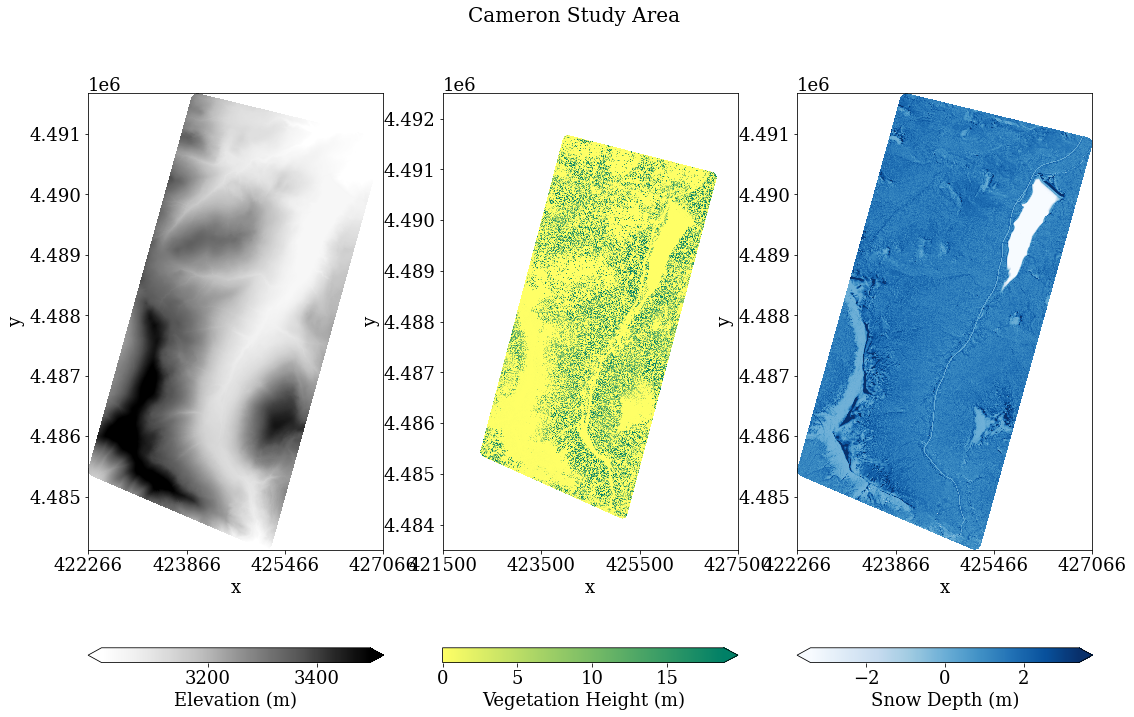

In [27]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create fig and axes elements
fig, axs = plt.subplots(ncols = 3, figsize=(18, 12))

#plot the data
cam_dem.plot(ax = axs[0], cmap = 'Greys', robust = True, cbar_kwargs={'label': 'Elevation (m)', 'orientation':'horizontal'}) 
cam_vh.plot(ax = axs[1], cmap = 'summer_r', robust = True, cbar_kwargs={'label': 'Vegetation Height (m)', 'orientation':'horizontal'})
cam_sd.plot(ax = axs[2], cmap = 'Blues', robust = True, cbar_kwargs={'label': 'Snow Depth (m)', 'orientation':'horizontal'})

#Set the title
# fig.suptitle('Cameron Study Area', fontsize = 20)

#set the axes title and tick locators
axs[0].set_title('')
axs[0].xaxis.set_major_locator(plt.LinearLocator(4))
axs[1].set_title('')
axs[1].xaxis.set_major_locator(plt.LinearLocator(4))
axs[2].set_title('')
axs[2].xaxis.set_major_locator(plt.LinearLocator(4))


plt.show()


Do a 2, 3 [20, 80] size of the box plot and hist

In [35]:
# #create fig and axes elements
# fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 12))

# # #plot the data
# # cam_dem.plot.boxplot(ax = axs[0,0])
# # cam_vh.plot.boxplot(ax = axs[0,1])
# # cam_sd.plot.boxplot(ax = axs[0,2])
# cam_dem.plot.hist(ax = axs[1,0], bins = 100) 
# cam_vh.plot.hist(ax = axs[1,1], bins = 100)
# cam_sd.plot.hist(ax = axs[1,2], bins = 100)

# #set the axes title and tick locators
# axs[0,0].set_title('')
# #axs[0,0].xaxis.set_major_locator(plt.LinearLocator(4))
# axs[0,1].set_title('')
# #axs[0,1].xaxis.set_major_locator(plt.LinearLocator(4))
# axs[0,2].set_title('')
# #axs[0,2].xaxis.set_major_locator(plt.LinearLocator(4))


# plt.show()

For more insightful plot and better control of the figure, let's use seaborn or matplotlib. `DataArray.plot()` method is able to handle the 3-D DataArray object, but we need to change the dimension to 2-D to use seaborn and matplotlib. This is achieved by using `DataArray.squeeze()`

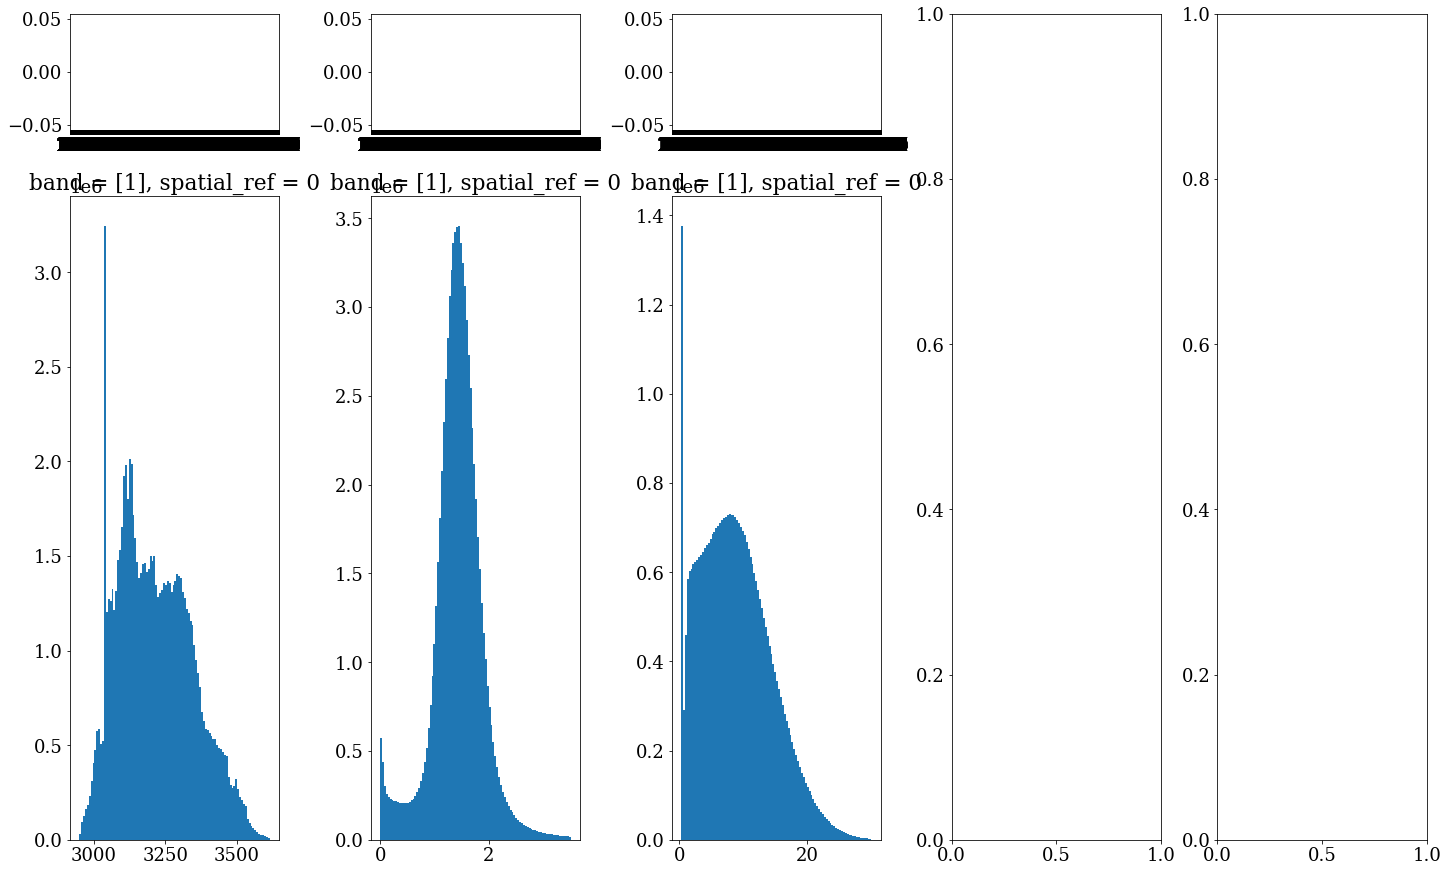

In [61]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(20,12), constrained_layout=True)
gspec = fig.add_gridspec(ncols=5, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[0, 2])
ax3 = fig.add_subplot(gspec[1:5, 0])
ax4 = fig.add_subplot(gspec[1:5, 1])
ax5 = fig.add_subplot(gspec[1:5, 2])
ax6 = fig.add_subplot(gspec[0:5, 3])
ax7 = fig.add_subplot(gspec[0:5, 4])

# plot the histogram and boxplot of elevation, vegetation and snow thickness
cam_dem.plot.hist(ax = ax3, bins = 100)
cam_vh.plot.hist(ax = ax4, bins = 100, range = [0.3, 30])
cam_sd.plot.hist(ax = ax5, bins = 100, range = [0, 3.5])

# plot the boxplot of elevation, vegetation and snow thickness
ax0.boxplot(cam_dem.squeeze())
ax1.boxplot(cam_vh.squeeze())
ax2.boxplot(cam_sd.squeeze())
# plt.boxplot(cam_sd.squeeze(), ax = ax0)
# plt.boxplot(cam_dem.squeeze(), ax = ax1)
# plt.boxplot(cam_vh.squeeze(), ax = ax2)

# sns.kdeplot(data = df, x = 'snow', y = 'elev', shade=True, ax=ax4, cmap='Blues')

# #set x-axis labels
# ax0.set_xlabel('')
# ax1.set_xlabel('')


# #set y-axis labels
# ax2.set_ylabel('')


# #remove tick of the firstand second  axes
# ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)




# #remove all spines on first axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.spines['bottom'].set_visible(False)
# ax0.spines['left'].set_visible(False)

# #remove all spines on second axes
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)

plt.show()

For faster plotting, I am slicing over some regions

In [10]:
cam_dem_roi = cam_dem.sel(y = slice(4489168, 4487655), x = slice(425077, 425848))
cam_vh_roi = cam_vh.sel(y = slice(4489168, 4487655), x = slice(425077, 425848))
cam_sd_roi = cam_sd.sel(y = slice(4489168, 4487655), x = slice(425077, 425848))

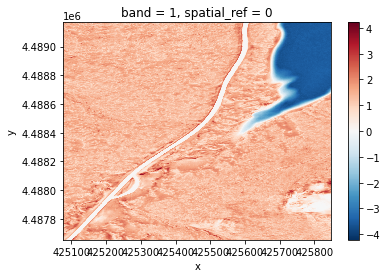

In [51]:
cam_sd_roi.plot()

In [32]:
#save tiff file
cam_sd_roi.rio.to_raster('/home/naheemadebisi/snow-analytics/SnowEx_Lidar_Tutorial/Results/cam_sd_roi.tif')

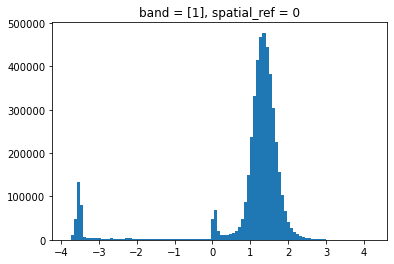

In [52]:
cam_sd_roi.plot.hist(bins = 100)
plt.show()

In [54]:
cam_sd_roi

<xarray.DataArray (band: 1, y: 3026, x: 1542)>
array([[[ 1.142822,  1.143311, ..., -3.446533, -3.442871],
        [ 1.104248,  1.090088, ..., -3.441162, -3.476562],
        ...,
        [ 0.959717,  1.010498, ...,  1.343018,  1.36377 ],
        [ 0.925537,  0.981201, ...,  1.321289,  1.378662]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.251e+05 4.251e+05 ... 4.258e+05 4.258e+05
  * y            (y) float64 4.489e+06 4.489e+06 ... 4.488e+06 4.488e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

ScatterPlot

In [55]:
cam_ds_roi = xr.Dataset({'dem': cam_dem_roi, 'vh': cam_vh_roi, 'sd': cam_sd_roi})
cam_ds_roi

<xarray.Dataset>
Dimensions:      (band: 1, x: 1542, y: 3026)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.251e+05 4.251e+05 ... 4.258e+05 4.258e+05
  * y            (y) float64 4.489e+06 4.489e+06 ... 4.488e+06 4.488e+06
    spatial_ref  int64 0
Data variables:
    dem          (band, y, x) float32 ...
    vh           (band, y, x) float32 ...
    sd           (band, y, x) float32 1.143 1.143 1.122 ... 1.26 1.321 1.379

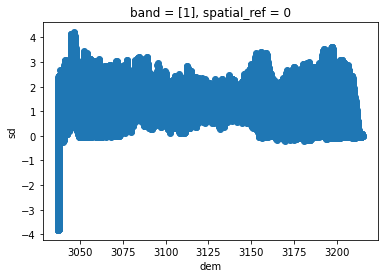

In [56]:
cam_ds_roi.plot.scatter(x = 'dem', y = 'sd')

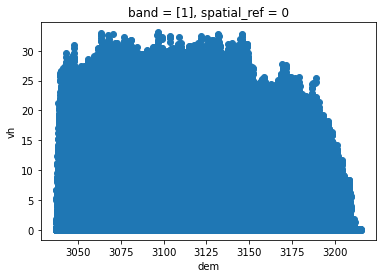

In [57]:
cam_ds_roi.plot.scatter(x = 'dem', y = 'vh')

## SAMPLE RASTER VALUES AT POINT LOCATIONS
Should I use point query or zonal stat

In [36]:
#import point location data
cam_100_points = gpd.read_file('/SNOWDATA/Nah/lidar_mosaic/random_points/cameron_100_points.gpkg')
cam_100_points.head()

,id,geometry
0,0,POINT (425411.302 4488232.531)
1,1,POINT (425145.685 4487820.709)
2,2,POINT (425081.111 4488051.057)
3,3,POINT (425847.197 4488964.657)
4,4,POINT (425145.016 4487909.559)


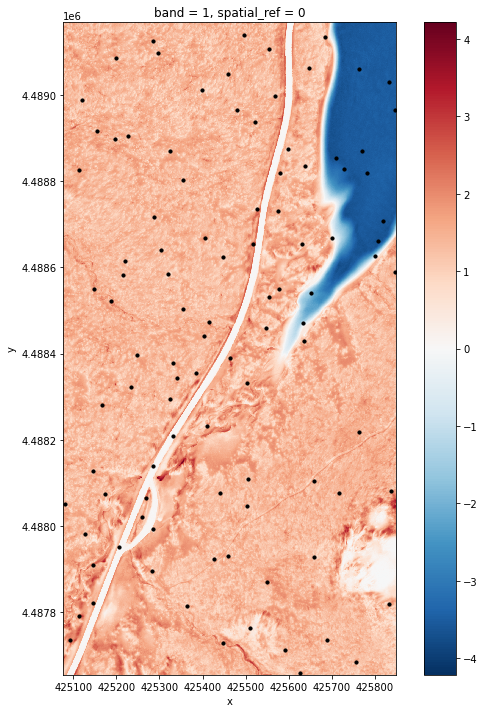

In [38]:
fig, ax = plt.subplots(figsize=(10,12))
cam_sd_roi.plot(ax = ax)
cam_100_points.plot(ax = ax, color = 'black', markersize = 10)
plt.show()

Clip by extent

Create a buffer around the point

In [39]:
#create a buffer around the point feature
cam_100_points.buffer(20).to_file('/home/naheemadebisi/snow-analytics/SnowEx_Lidar_Tutorial/Results/cam_100_points_buffer.gpkg')

/home/naheemadebisi/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [55]:
cam_100_poly = gpd.read_file('/home/naheemadebisi/snow-analytics/SnowEx_Lidar_Tutorial/Results/cam_100_points_buffer.gpkg')

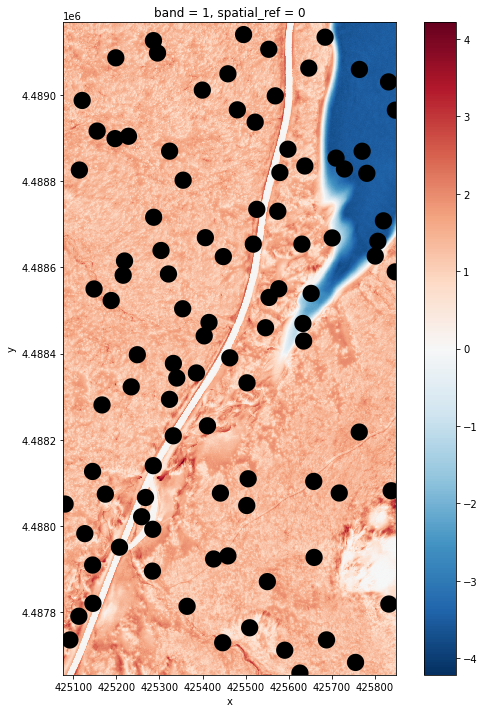

In [56]:
fig, ax = plt.subplots(figsize=(10,12))
cam_sd_roi.plot(ax = ax)
cam_100_poly.plot(ax = ax, color = 'black')
plt.show()

In [48]:
#Extract raster values
cam_VH_stat = rs.zonal_stats('/home/naheemadebisi/snow-analytics/SnowEx_Lidar_Tutorial/Results/cam_100_points_buffer.gpkg', 
            cam_vh_roi.squeeze().values,
            nodata = -9999,
            geojson_out=True,
            affine = cam_vh.rio.transform(), 
            stats = 'count mean')


In [54]:
cam_VH_stat_df =  gpd.GeoDataFrame.from_features(cam_VH_stat)
cam_VH_stat_df.head(50)

,geometry,count,mean
0,"POLYGON ((425431.302 4488232.531, 425431.205 4...",0,None
1,"POLYGON ((425165.685 4487820.709, 425165.589 4...",0,None
2,"POLYGON ((425101.111 4488051.057, 425101.015 4...",0,None
3,"POLYGON ((425867.197 4488964.657, 425867.101 4...",0,None
4,"POLYGON ((425165.016 4487909.559, 425164.920 4...",0,None
5,"POLYGON ((425866.888 4488589.517, 425866.792 4...",0,None
6,"POLYGON ((425677.813 4488103.563, 425677.717 4...",0,None
7,"POLYGON ((425852.072 4487819.099, 425851.976 4...",0,None
8,"POLYGON ((425208.070 4488523.147, 425207.973 4...",0,None
9,"POLYGON ((425820.515 4488626.299, 425820.419 4...",0,None


In [58]:
cam_VH_stat_points = rs.point_query('/SNOWDATA/Nah/lidar_mosaic/random_points/cameron_100_points.gpkg', 
            cam_vh_roi.squeeze().values,
            nodata = -9999,
            geojson_out=True,
            affine = cam_vh.rio.transform()
            )

In [59]:
cam_VH_stat_points

[{'type': 'Feature',
  'id': '1',
  'properties': OrderedDict([('id', 0), ('value', None)]),
  'geometry': {'type': 'Point',
   'coordinates': (425411.30175442394, 4488232.530935788)}},
 {'type': 'Feature',
  'id': '2',
  'properties': OrderedDict([('id', 1), ('value', None)]),
  'geometry': {'type': 'Point',
   'coordinates': (425145.68536783935, 4487820.708621189)}},
 {'type': 'Feature',
  'id': '3',
  'properties': OrderedDict([('id', 2), ('value', None)]),
  'geometry': {'type': 'Point',
   'coordinates': (425081.11149117036, 4488051.056776508)}},
 {'type': 'Feature',
  'id': '4',
  'properties': OrderedDict([('id', 3), ('value', None)]),
  'geometry': {'type': 'Point',
   'coordinates': (425847.1970182848, 4488964.656651505)}},
 {'type': 'Feature',
  'id': '5',
  'properties': OrderedDict([('id', 4), ('value', None)]),
  'geometry': {'type': 'Point',
   'coordinates': (425145.01619487134, 4487909.5590254)}},
 {'type': 'Feature',
  'id': '6',
  'properties': OrderedDict([('id', 5),

Why do I get none values


To do; interactive plotting and background layer

References:
1. Earthdatascience